<a href="https://colab.research.google.com/github/KIRTIKUMARKK21/Data-Science/blob/master/TataMotorsStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
!pip install jupyter-dash
!pip install --upgrade plotly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/project3/TATAMOTORS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-30,454.299988,462.250000,451.549988,459.250000,459.064087,13214064.0
1,2016-07-01,463.600006,464.750000,454.700012,457.899994,457.714630,7027759.0
2,2016-07-04,467.000000,474.850006,467.000000,469.500000,469.309937,8413087.0
3,2016-07-05,468.500000,469.000000,459.500000,460.899994,460.713409,4934087.0
4,2016-07-07,460.950012,465.450012,454.100006,455.149994,454.965729,6580663.0


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,286.771243,290.897766,282.006012,286.051300,286.049590,3.205813e+07
std,142.164585,143.183116,140.834933,141.853652,141.851398,3.796870e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,1.154721e+06
25%,166.924995,170.174995,163.650002,167.000000,167.000000,7.151805e+06
50%,269.200012,271.850006,262.200012,267.049988,267.049988,1.631217e+07
75%,424.600006,429.099991,420.100006,423.574997,423.574997,4.505694e+07
max,590.750000,598.400024,584.000000,588.700012,588.700012,3.905778e+08


In [ ]:
df.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(1231, 7)

In [ ]:
fig=px.line(df,x='Date',y='Close',title="Tata Motors Stock Price Over 5 Years")
fig.show()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data=df.copy()

In [ ]:
lag_features=['High','Low','Volume']
window1=3
window2=7

In [ ]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [ ]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
0,2016-06-30,454.299988,462.250000,451.549988,459.250000,459.064087,13214064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-01,463.600006,464.750000,454.700012,457.899994,457.714630,7027759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-04,467.000000,474.850006,467.000000,469.500000,469.309937,8413087.0,467.283335,NaN,457.750000,NaN,9.551637e+06,NaN,6.671085,NaN,8.164101,NaN,3.246508e+06,NaN
3,2016-07-05,468.500000,469.000000,459.500000,460.899994,460.713409,4934087.0,469.533335,NaN,460.400004,NaN,6.791644e+06,NaN,5.071081,NaN,6.199188,NaN,1.751477e+06,NaN
4,2016-07-07,460.950012,465.450012,454.100006,455.149994,454.965729,6580663.0,469.766673,NaN,460.200002,NaN,6.642612e+06,NaN,4.746663,NaN,6.478423,NaN,1.740327e+06,NaN


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [ ]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7', 'Lowrolling_mean_3',
       'Lowrolling_mean_7', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Highrolling_std_3', 'Highrolling_std_7', 'Lowrolling_std_3',
       'Lowrolling_std_7', 'Volumerolling_std_3', 'Volumerolling_std_7']

In [ ]:
data.shape

(1225, 19)

In [ ]:
training_data=data[0:800]
test_data=data[800:]

In [ ]:
training_data

,Date,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
6,2016-07-11,472.100006,486.799988,472.100006,484.600006,484.403809,10477166.0,473.483337,470.185717,462.950002,460.228572,8.773852e+06,8.558650e+06,11.614238,8.347535,9.003749,7.490209,1.993907e+06,2.746677e+06
7,2016-07-12,486.000000,488.649994,481.100006,484.299988,484.103912,6767972.0,481.216665,473.957145,471.950002,464.450003,8.836288e+06,7.637780e+06,11.310639,9.970593,9.225921,9.765372,1.891179e+06,1.864719e+06
8,2016-07-13,485.950012,488.100006,477.950012,481.100006,480.905243,5855718.0,487.849996,477.292860,477.050008,467.771432,7.700285e+06,7.470346e+06,0.950005,10.278103,4.567002,9.850039,2.447724e+06,1.977812e+06
9,2016-07-14,480.100006,489.299988,478.950012,486.100006,485.903229,5983007.0,488.683329,479.357143,479.333343,469.478577,6.202232e+06,7.123191e+06,0.600685,11.122133,1.609603,10.693493,4.940614e+05,1.997926e+06
10,2016-07-15,480.000000,501.700012,479.649994,494.000000,493.800018,8889558.0,493.033335,484.028573,478.850006,472.357147,6.909428e+06,7.688259e+06,7.529505,12.789245,0.854392,10.263100,1.716024e+06,1.827704e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2019-10-03,112.650002,123.500000,112.650002,122.400002,122.400002,65103359.0,121.399999,125.142855,114.016668,118.935715,4.583168e+07,4.549484e+07,1.886135,4.712874,2.071433,5.558530,1.717106e+07,1.007739e+07
802,2019-10-04,122.800003,123.800003,118.800003,119.650002,119.650002,35712218.0,122.383334,123.942856,114.816668,117.621430,4.701612e+07,4.464529e+07,2.199055,3.539941,3.454105,3.897634,1.582624e+07,1.068689e+07
803,2019-10-07,120.250000,120.550003,116.349998,117.500000,117.500000,35471184.0,122.616669,122.607143,115.933334,116.885715,4.542892e+07,4.291723e+07,1.796060,2.540412,3.096100,3.510308,1.703899e+07,1.110540e+07
804,2019-10-09,118.500000,121.699997,115.449997,120.900002,120.900002,44666296.0,122.016668,121.814285,116.866666,115.835714,3.861657e+07,4.274579e+07,1.647979,1.504913,1.733737,2.355793,5.240606e+06,1.106146e+07


In [ ]:
model=auto_arima(y=training_data['Close'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4942.814, Time=2.71 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5152.767, Time=1.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5016.671, Time=1.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4969.807, Time=1.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9699.456, Time=0.99 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4969.360, Time=2.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4942.523, Time=1.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4971.189, Time=1.71 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4946.381, Time=1.96 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4948.161, Time=2.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4944.058, Time=2.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4944.254, Time=2.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4940.505, Time=1.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4969.181, Time=1.71 sec
 ARIMA(2,0,0)(0,0,0)[0]          

In [ ]:
model.fit(training_data['Close'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [ ]:
test_data['Forecast_ARIMA']=forecast

In [ ]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Forecast_ARIMA
806,2019-10-11,118.050003,122.199997,117.250000,121.300003,121.300003,41027561.0,121.199997,121.614285,116.299998,115.671428,3.897435e+07,4.192037e+07,1.322876,1.663009,0.904159,2.211119,6.949870e+06,1.112857e+07,117.069681
807,2019-10-14,122.599998,130.000000,122.500000,127.849998,127.849998,68048611.0,123.966665,123.064285,118.649999,117.028571,4.676845e+07,4.589406e+07,5.372462,3.393219,3.375279,3.053258,1.906924e+07,1.478950e+07,120.830598
808,2019-10-15,127.099998,128.899994,123.699997,126.949997,126.949997,57548920.0,127.033330,123.835713,121.149999,118.607142,5.554170e+07,4.481485e+07,4.221769,4.057576,3.430378,3.261573,1.362189e+07,1.336078e+07,126.216836
809,2019-10-16,127.300003,128.300003,124.500000,125.849998,125.849998,31522518.0,129.066666,124.478570,123.566666,119.421427,5.237335e+07,4.421633e+07,0.862167,4.393542,1.006644,3.955467,1.880502e+07,1.391871e+07,128.985620
810,2019-10-17,127.099998,144.350006,125.099998,139.500000,139.500000,67933615.0,133.850001,127.878571,124.433332,120.671427,5.233502e+07,4.885382e+07,9.098218,8.310030,0.702378,4.198200,1.875715e+07,1.580016e+07,136.515754


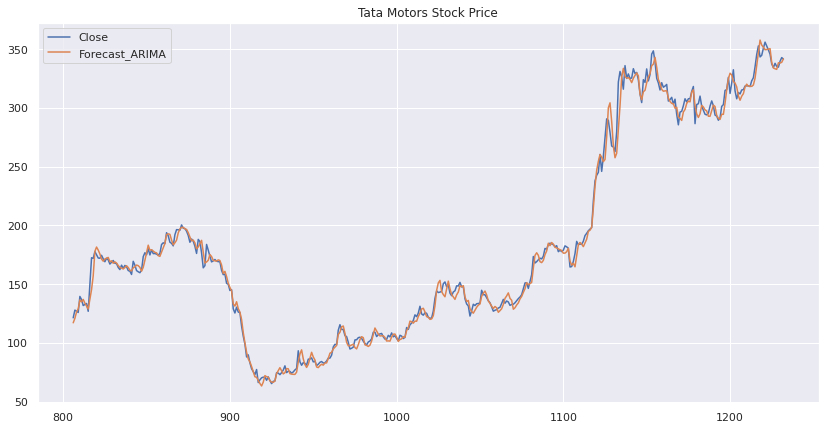

In [ ]:
test_data[['Close','Forecast_ARIMA']].plot(figsize=(14,7),title="Tata Motors Stock Price")

In [ ]:
tempdata=test_data.reset_index()

#Forecast is predicted Value of Close and Close is original value of Close

In [ ]:
fig=px.line(tempdata,x='Date',y=['Close','Forecast_ARIMA'],title='Predicting Value of Tata Motors Stocks')
fig.show()